<a href="https://colab.research.google.com/github/1eetnals/Child-abuse-detection-system-using-TEN4FACESp/blob/main/face_age_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### npz 파일 다루기 먼저 시작! 코드 돌릴 때 굳이 실행할 필요 없음
import numpy as np
data = np.load('/content/drive/Shareddrives/BME캡스톤/data/data_final/age_prediction/video/youtube_faces_with_keypoints_full_1/youtube_faces_with_keypoints_full_1/AJ_Cook_0.npz')

for key in data.keys():
    print("variable name:", key          , end="  ")
    print("type: "+ str(data[key].dtype) , end="  ")
    print("shape:"+ str(data[key].shape))

variable name: colorImages  type: uint8  shape:(192, 125, 3, 73)
variable name: boundingBox  type: float64  shape:(4, 2, 73)
variable name: landmarks2D  type: float64  shape:(68, 2, 73)
variable name: landmarks3D  type: float64  shape:(68, 3, 73)


In [ ]:
# mp4 --> ndarray




In [ ]:
!pip install filetype

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.offline as py
import plotly.graph_objs as go
import glob
import ipywidgets as widgets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os

import tensorflow_hub as hub
import tensorflow as tf
from PIL import Image

from google.colab.patches import cv2_imshow   #cv2.imshow가 코랩에서는 작동안함
# Import Libraries
import cv2
import os
import filetype

py.init_notebook_mode(connected=True)

from subprocess import check_output

from keras.preprocessing.image import load_img, img_to_array
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

In [ ]:
videoDF = pd.read_csv('/content/drive/Shareddrives/BME캡스톤/data/data_final/age_prediction/video/youtube_faces_with_keypoints_full.csv')
videoDF.head(10)

,videoID,personName,imageHeight,imageWidth,videoDuration,averageFaceSize,numVideosForPerson
0,Alison_Lohman_0,Alison_Lohman,228.0,213.0,240.0,90.150000,6.0
1,Alison_Lohman_1,Alison_Lohman,248.0,201.0,79.0,108.417722,6.0
2,Alison_Lohman_2,Alison_Lohman,335.0,308.0,136.0,122.161765,6.0
3,Alison_Lohman_3,Alison_Lohman,151.0,110.0,53.0,58.000000,6.0
4,Alison_Lohman_4,Alison_Lohman,236.0,228.0,147.0,91.680272,6.0
5,Alison_Lohman_5,Alison_Lohman,227.0,179.0,68.0,105.647059,6.0
6,Kevin_Spacey_0,Kevin_Spacey,196.0,264.0,91.0,99.912088,6.0
7,Kevin_Spacey_1,Kevin_Spacey,260.0,217.0,59.0,120.186441,6.0
8,Kevin_Spacey_2,Kevin_Spacey,186.0,175.0,71.0,86.746479,6.0
9,Kevin_Spacey_3,Kevin_Spacey,100.0,89.0,99.0,44.636364,6.0


In [ ]:
npzFilesFullPath1 = glob.glob('/content/drive/Shareddrives/BME캡스톤/data/data_final/age_prediction/video/youtube_faces_with_keypoints_full_1/youtube_faces_with_keypoints_full_1/*.npz')
npzFilesFullPath2 = glob.glob('/content/drive/Shareddrives/BME캡스톤/data/data_final/age_prediction/video/youtube_faces_with_keypoints_full_2/youtube_faces_with_keypoints_full_2/*.npz')
npzFilesFullPath3 = glob.glob('/content/drive/Shareddrives/BME캡스톤/data/data_final/age_prediction/video/youtube_faces_with_keypoints_full_3/youtube_faces_with_keypoints_full_3/*.npz')
npzFilesFullPath4 = glob.glob('/content/drive/Shareddrives/BME캡스톤/data/data_final/age_prediction/video/youtube_faces_with_keypoints_full_4/youtube_faces_with_keypoints_full_4/*.npz')

videoIDs1 = [x.split('/')[-1].split('.')[0] for x in npzFilesFullPath1]
videoIDs2 = [x.split('/')[-1].split('.')[0] for x in npzFilesFullPath2]
videoIDs3 = [x.split('/')[-1].split('.')[0] for x in npzFilesFullPath3]
videoIDs4 = [x.split('/')[-1].split('.')[0] for x in npzFilesFullPath4]

fullPaths1 = {}
for videoID, fullPath in zip(videoIDs1, npzFilesFullPath1):
    fullPaths1[videoID] = fullPath

fullPaths2 = {}
for videoID, fullPath in zip(videoIDs2, npzFilesFullPath2):
    fullPaths2[videoID] = fullPath

fullPaths3 = {}
for videoID, fullPath in zip(videoIDs3, npzFilesFullPath3):
    fullPaths3[videoID] = fullPath

fullPaths4 = {}
for videoID, fullPath in zip(videoIDs4, npzFilesFullPath4):
    fullPaths4[videoID] = fullPath

# remove from the large csv file all videos that weren't uploaded yet
videoDF = videoDF.loc[videoDF.loc[:,'videoID'].isin(fullPaths1.keys()),:].reset_index(drop=True)
print('Number of Videos uploaded so far is %d' %(videoDF.shape[0]))

videoDF = videoDF.loc[videoDF.loc[:,'videoID'].isin(fullPaths2.keys()),:].reset_index(drop=True)
print('Number of Videos uploaded so far is %d' %(videoDF.shape[0]))

videoDF = videoDF.loc[videoDF.loc[:,'videoID'].isin(fullPaths3.keys()),:].reset_index(drop=True)
print('Number of Videos uploaded so far is %d' %(videoDF.shape[0]))

videoDF = videoDF.loc[videoDF.loc[:,'videoID'].isin(fullPaths4.keys()),:].reset_index(drop=True)
print('Number of Videos uploaded so far is %d' %(videoDF.shape[0]))

Number of Videos uploaded so far is 544
Number of Videos uploaded so far is 0
Number of Videos uploaded so far is 0
Number of Videos uploaded so far is 0


In [ ]:
kmeans_df1 = pd.DataFrame()
for i,video in enumerate(videoDF.iterrows()):
    videoID = videoDF.loc[i,'videoID']
    videoFile = np.load(fullPaths1[videoID])
    landmarks3D = videoFile['landmarks3D']
    landmarks3D[:,0,0] -= np.mean(landmarks3D[:,0,0])
    landmarks3D[:,0,0]/= np.std(landmarks3D[:,0,0])
    landmarks3D[:,1,0] -= np.mean(landmarks3D[:,1,0])
    landmarks3D[:,1,0]/= np.std(landmarks3D[:,1,0])
    landmarks3D[:,2,0] -= np.mean(landmarks3D[:,2,0])
    landmarks3D[:,2,0]/= np.std(landmarks3D[:,2,0])
    kmeans_df1[i] = sum(landmarks3D[:,:,0].tolist(), [])

kmeans_df2 = pd.DataFrame()
for i,video in enumerate(videoDF.iterrows()):
    videoID = videoDF.loc[i,'videoID']
    videoFile = np.load(fullPaths2[videoID])
    landmarks3D = videoFile['landmarks3D']
    landmarks3D[:,0,0] -= np.mean(landmarks3D[:,0,0])
    landmarks3D[:,0,0]/= np.std(landmarks3D[:,0,0])
    landmarks3D[:,1,0] -= np.mean(landmarks3D[:,1,0])
    landmarks3D[:,1,0]/= np.std(landmarks3D[:,1,0])
    landmarks3D[:,2,0] -= np.mean(landmarks3D[:,2,0])
    landmarks3D[:,2,0]/= np.std(landmarks3D[:,2,0])
    kmeans_df2[i] = sum(landmarks3D[:,:,0].tolist(), [])

kmeans_df3 = pd.DataFrame()
for i,video in enumerate(videoDF.iterrows()):
    videoID = videoDF.loc[i,'videoID']
    videoFile = np.load(fullPaths3[videoID])
    landmarks3D = videoFile['landmarks3D']
    landmarks3D[:,0,0] -= np.mean(landmarks3D[:,0,0])
    landmarks3D[:,0,0]/= np.std(landmarks3D[:,0,0])
    landmarks3D[:,1,0] -= np.mean(landmarks3D[:,1,0])
    landmarks3D[:,1,0]/= np.std(landmarks3D[:,1,0])
    landmarks3D[:,2,0] -= np.mean(landmarks3D[:,2,0])
    landmarks3D[:,2,0]/= np.std(landmarks3D[:,2,0])
    kmeans_df3[i] = sum(landmarks3D[:,:,0].tolist(), [])

kmeans_df4 = pd.DataFrame()
for i,video in enumerate(videoDF.iterrows()):
    videoID = videoDF.loc[i,'videoID']
    videoFile = np.load(fullPaths4[videoID])
    landmarks3D = videoFile['landmarks3D']
    landmarks3D[:,0,0] -= np.mean(landmarks3D[:,0,0])
    landmarks3D[:,0,0]/= np.std(landmarks3D[:,0,0])
    landmarks3D[:,1,0] -= np.mean(landmarks3D[:,1,0])
    landmarks3D[:,1,0]/= np.std(landmarks3D[:,1,0])
    landmarks3D[:,2,0] -= np.mean(landmarks3D[:,2,0])
    landmarks3D[:,2,0]/= np.std(landmarks3D[:,2,0])
    kmeans_df4[i] = sum(landmarks3D[:,:,0].tolist(), [])

In [ ]:
# dictionary에서 key값만 읽어와 list로 만들기

f1 = list(fullPaths1.keys())
f2 = list(fullPaths2.keys())
f3 = list(fullPaths3.keys())
f4 = list(fullPaths4.keys())

(332, 329, 3, 83)

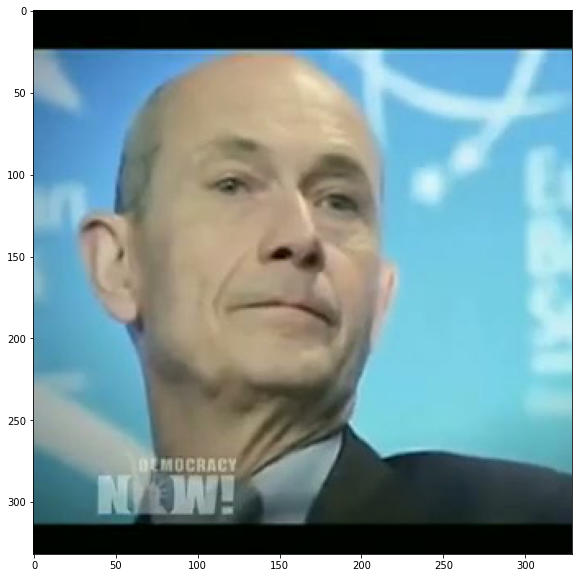

In [ ]:
# 확인용이라 코드 돌릴 때 굳이 실행할 필요 없음
videoFile = np.load(fullPaths4['Pascal_Lamy_4'])
plt.figure(figsize = (10,10))
colorImages = videoFile['colorImages']
plt.imshow(colorImages[:,:,:,colorImages.shape[3]//2])
colorImages.shape

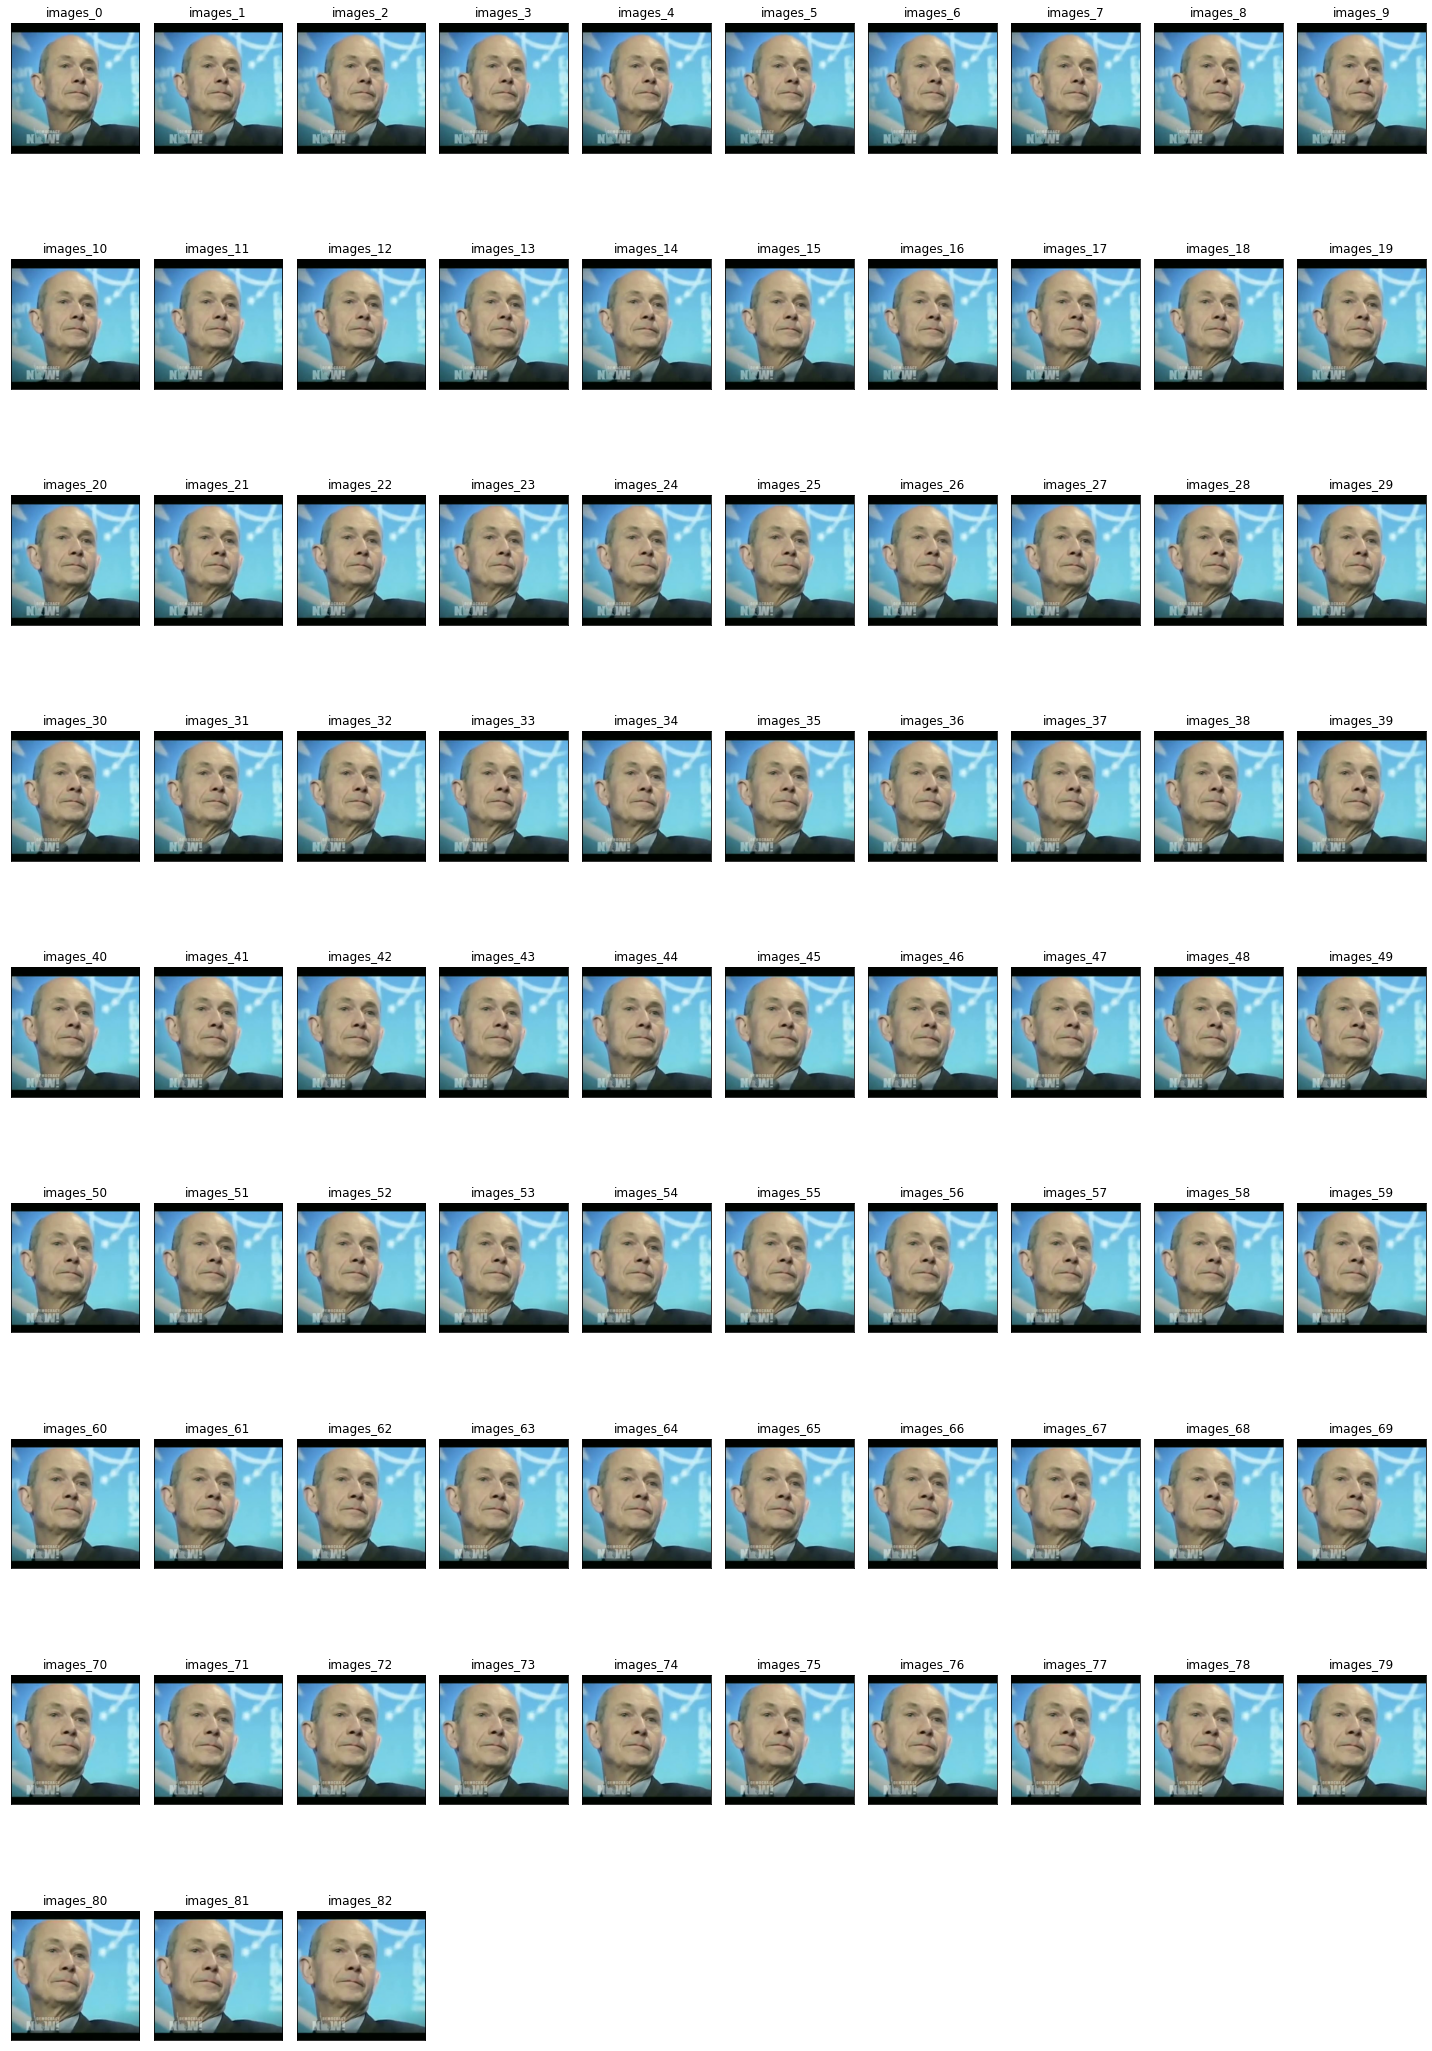

In [ ]:
# colorImages[:,:,:,239]

plt.rcParams['figure.figsize'] = (20,30)

for i in range(colorImages.shape[3]):
  plt.subplot(9,10,i+1)
  plt.title(f'images_{i}')
  plt.xticks([]) # x = None
  plt.yticks([]) # y = None
  plt.imshow(colorImages[:,:,:,i])
plt.tight_layout()
plt.show()

In [ ]:
# The model architecture
# download from: https://drive.google.com/open?id=1kiusFljZc9QfcIYdU2s7xrtWHTraHwmW
AGE_MODEL = '/content/drive/Shareddrives/BME캡스톤/code/sumin/deploy_age.prototxt'
# The model pre-trained weights
# download from: https://drive.google.com/open?id=1kWv0AjxGSN0g31OeJa02eBGM0R_jcjIl
AGE_PROTO = '/content/drive/Shareddrives/BME캡스톤/code/sumin/age_net.caffemodel'
# Each Caffe Model impose the shape of the input image also image preprocessing is required like mean
# substraction to eliminate the effect of illunination changes
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
# Represent the 8 age classes of this CNN probability layer
#AGE_INTERVALS = ['(0, 2)', '(4, 6)', '(8, 12)', '(15, 20)',
                 #'(25, 32)', '(38, 43)', '(48, 53)', '(60, 100)']
AGE_INTERVALS = ['(0, 6)', '(7, 15)', '(16, 21)', '(22, 40)',
                 '(41, 55)', '(56, 70)', '(71, 85)', '(86, 100)']
# download from: https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
FACE_PROTO = "/content/drive/Shareddrives/BME캡스톤/code/sumin/deploy.prototxt.txt"
# download from: https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20180205_fp16/res10_300x300_ssd_iter_140000_fp16.caffemodel
FACE_MODEL = "/content/drive/Shareddrives/BME캡스톤/code/sumin/res10_300x300_ssd_iter_140000_fp16.caffemodel"

# Initialize frame size
frame_width = 1280
frame_height = 720

# load face Caffe model
face_net = cv2.dnn.readNetFromCaffe(FACE_PROTO, FACE_MODEL)
# Load age prediction model
age_net = cv2.dnn.readNetFromCaffe(AGE_MODEL, AGE_PROTO)

  Age: 0 - 6 / score: 93%


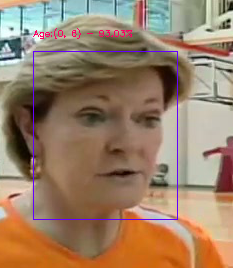

  Age: 0 - 6 / score: 94%


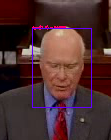

  Age: 0 - 6 / score: 83%


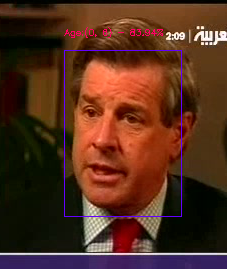

  Age: 0 - 6 / score: 99%


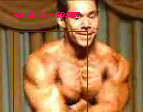

KeyboardInterrupt: ignored

In [ ]:
# video 폴더에서 0-6세, 정확도 80% 이상의 얼굴 이미지만 crop

def get_faces(frame, confidence_threshold=0.5):
    """Returns the box coordinates of all detected faces"""
    # convert the frame into a blob to be ready for NN input
    blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300), (104, 177.0, 123.0))
    # set the image as input to the NN
    face_net.setInput(blob)
    # perform inference and get predictions
    output = np.squeeze(face_net.forward())
    # initialize the result list
    faces = []
    # Loop over the faces detected
    for i in range(output.shape[0]):
        confidence = output[i, 2]
        if confidence > confidence_threshold:
            box = output[i, 3:7] * np.array([frame.shape[1], frame.shape[0], frame.shape[1], frame.shape[0]])
            # convert to integers
            start_x, start_y, end_x, end_y = box.astype(np.int64)
            # widen the box a little
            start_x, start_y, end_x, end_y = start_x - \
                10, start_y - 10, end_x + 10, end_y + 10
            start_x = 0 if start_x < 0 else start_x
            start_y = 0 if start_y < 0 else start_y
            end_x = 0 if end_x < 0 else end_x
            end_y = 0 if end_y < 0 else end_y
            # append to our list
            faces.append((start_x, start_y, end_x, end_y))
    return faces


def get_optimal_font_scale(text, width):
    """Determine the optimal font scale based on the hosting frame width"""
    for scale in reversed(range(0, 60, 1)):
        textSize = cv2.getTextSize(text, fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=scale/10, thickness=1)
        new_width = textSize[0][0]
        if (new_width <= width):
            return scale/10
    return 1

# from: https://stackoverflow.com/questions/44650888/resize-an-image-without-distortion-opencv
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]
    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image
    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)
    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))
    # resize the image
    return cv2.resize(image, dim, interpolation = inter)

# 선택된 부분만 이미지로 저장하는 함수
def im_trim (img,x,y,idx): #함수로 만든다  
  img_trim = img[y[0]:y[1]+(y[1]-y[0])//4, x[0]:x[1]] #trim한 결과를 img_trim에 담는다
  resized_img = cv2.resize(img_trim, dsize=(480,640))
  cv2.imwrite(f'/content/drive/Shareddrives/BME캡스톤/code/KYJ/video_face_seg_{idx}.jpg',resized_img) #save the image

def predict_age(colorImages,idx):
  max_img=[]
  max_v=0
  max_j=0
  max_rect=0
  for j in range(colorImages.shape[3]):
    frame = colorImages[:,:,:,j]
    
    # 이미지 색상 변환: openCV는 기본적으로 bgr로 구성
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    if frame.shape[1] > frame_width:
        frame = image_resize(frame, width=frame_width)
    faces = get_faces(frame)

    for i, (start_x, start_y, end_x, end_y) in enumerate(faces):
        face_img = frame[start_y: end_y, start_x: end_x]
        
        # image --> Input image to preprocess before passing it through our dnn for classification.
        blob = cv2.dnn.blobFromImage(
            image=face_img, scalefactor=1.0, size=(227, 227), 
            mean=MODEL_MEAN_VALUES, swapRB=False
        )

        # Predict Age
        age_net.setInput(blob)
        age_preds = age_net.forward()
        i = age_preds[0].argmax()
        age = AGE_INTERVALS[i]
        age_confidence_score = age_preds[0][i]
        
        # Draw the box
        label = f"Age:{age} - {age_confidence_score*100:.2f}%"
        score_k = int(age_confidence_score*100)

        # 선택한 조건에 해당하는 j값과 score값을 리스트에 저장해서 score_k가 가장 큰 j값에 해당하는 이미지만 저장 --> 코드 맨 아래에 추가할 예정
        # 나이는 추후 '(0, 6)'으로 수정해줄 것
        if age=='(0, 6)' and score_k>=80:          
          # box의 position 정보까지 temp에 저장할 예정이므로 여기부턴 코드가 좀 달라짐
          # get the position where to put the text
          yPos = start_y - 15
          while yPos < 15:
              yPos += 15
          
          # write the text into the frame
          fontScale = get_optimal_font_scale(label, 3*(frame.shape[1]//6))     ###내가 추가한것
          cv2.putText(frame, label, (start_x, yPos),cv2.FONT_HERSHEY_SIMPLEX, fontScale, (100, 0, 255), thickness=1)
          # draw the rectangle around the face
          temp=[j,score_k,cv2.rectangle(frame, (start_x, start_y), (end_x, end_y), color=(255, 0, 100), thickness=1),faces[0][0],faces[0][2],faces[0][1],faces[0][3]]
          max_img.append(temp)
        else:
          continue
  
  # 가장 score가 큰 이미지(final_frame) 저장
  if len(max_img)!=0:
    for k in range(len(max_img)):
      if max_img[k][1] > max_v:
        max_v = max_img[k][1]
        max_j = max_img[k][0]
        max_rect = max_img[k][2]
        max_x = [max_img[k][3],max_img[k][4]]
        max_y = [max_img[k][5],max_img[k][6]]
    final_frame=cv2.cvtColor(colorImages[:,:,:,max_j], cv2.COLOR_BGR2RGB) # colorImages[:,:,:,max_j]: age가 일치하고 score가 가장 높은 프레임의 array 정보. openCV는 BGR이 기본이므로 RGB로 고쳐 final_frame에 저장
    
    # final_frame resize
    resized_image = cv2.resize(final_frame, dsize=(640,480))

    # 얼굴 이미지만 crop
    im_trim(final_frame,max_x,max_y,idx)
    
    # 굵은 글씨체로 출력
    print('\033[1m' + f"  Age: 0 - 6 / score: {max_v}%" + '\033[0m')
    cv2_imshow(max_rect)

# 폴더별로 face segmentation 해주는 코드
idx=0
'''
for name in f1:
  videoFile = np.load(fullPaths1[name])
  colorImages = videoFile['colorImages']

  if __name__ == '__main__':
      predict_age(colorImages,idx)
      idx+=1

for name in f2:
  videoFile = np.load(fullPaths2[name])
  colorImages = videoFile['colorImages']

  if __name__ == '__main__':
      predict_age(colorImages,idx)
      idx+=1

for name in f3:
  videoFile = np.load(fullPaths3[name])
  colorImages = videoFile['colorImages']

  if __name__ == '__main__':
      predict_age(colorImages,idx)
      idx+=1
'''
for name in f4:
  videoFile = np.load(fullPaths4[name])
  colorImages = videoFile['colorImages']

  if __name__ == '__main__':
      predict_age(colorImages,idx)
      idx+=1

  Age: 41 - 55 / score: 97%


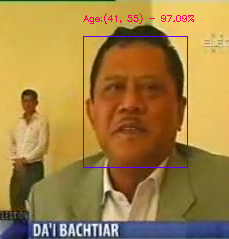

In [ ]:
def get_faces(frame, confidence_threshold=0.5):
    """Returns the box coordinates of all detected faces"""
    # convert the frame into a blob to be ready for NN input
    blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300), (104, 177.0, 123.0))
    # set the image as input to the NN
    face_net.setInput(blob)
    # perform inference and get predictions
    output = np.squeeze(face_net.forward())
    # initialize the result list
    faces = []
    # Loop over the faces detected
    for i in range(output.shape[0]):
        confidence = output[i, 2]
        if confidence > confidence_threshold:
            box = output[i, 3:7] * np.array([frame.shape[1], frame.shape[0], frame.shape[1], frame.shape[0]])
            # convert to integers
            start_x, start_y, end_x, end_y = box.astype(np.int64)
            # widen the box a little
            start_x, start_y, end_x, end_y = start_x - \
                10, start_y - 10, end_x + 10, end_y + 10
            start_x = 0 if start_x < 0 else start_x
            start_y = 0 if start_y < 0 else start_y
            end_x = 0 if end_x < 0 else end_x
            end_y = 0 if end_y < 0 else end_y
            # append to our list
            faces.append((start_x, start_y, end_x, end_y))
    return faces


def get_optimal_font_scale(text, width):
    """Determine the optimal font scale based on the hosting frame width"""
    for scale in reversed(range(0, 60, 1)):
        textSize = cv2.getTextSize(text, fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=scale/10, thickness=1)
        new_width = textSize[0][0]
        if (new_width <= width):
            return scale/10
    return 1

# from: https://stackoverflow.com/questions/44650888/resize-an-image-without-distortion-opencv
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]
    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image
    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)
    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))
    # resize the image
    return cv2.resize(image, dim, interpolation = inter)

###############################################################

## 아래로 youngju kim이 수정 ##

# 선택된 부분만 이미지로 저장하는 함수
def im_trim (img,x,y): #함수로 만든다  
  img_trim = img[y[0]:y[1]+(y[1]-y[0])//4, x[0]:x[1]] #trim한 결과를 img_trim에 담는다
  resized_img = cv2.resize(img_trim, dsize=(480,640))
  cv2.imwrite('/content/drive/Shareddrives/BME캡스톤/code/KYJ/face.jpg',resized_img) #org_trim.jpg 라는 이름으로 저장 


def predict_age(colorImages):
  max_img=[]
  max_v=0
  max_j=0
  max_putT=0
  max_rect=0
  for j in range(colorImages.shape[3]):
    frame = colorImages[:,:,:,j]
    
    # 이미지 색상 변환: openCV는 기본적으로 bgr로 구성
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    if frame.shape[1] > frame_width:
        frame = image_resize(frame, width=frame_width)
    faces = get_faces(frame)

    for i, (start_x, start_y, end_x, end_y) in enumerate(faces):
        face_img = frame[start_y: end_y, start_x: end_x]
        
        # image --> Input image to preprocess before passing it through our dnn for classification.
        blob = cv2.dnn.blobFromImage(
            image=face_img, scalefactor=1.0, size=(227, 227), 
            mean=MODEL_MEAN_VALUES, swapRB=False
        )

        # Predict Age
        age_net.setInput(blob)
        age_preds = age_net.forward()
        #각 interval의 정확도 출력해주는 코드: 출력 결과가 너무 길어져 지워줌
        #print("="*30, f"Face {i+1} Prediction Probabilities", "="*30)
        #for i in range(age_preds[0].shape[0]):
        #    print(f"{AGE_INTERVALS[i]}: {age_preds[0, i]*100:.2f}%")
        i = age_preds[0].argmax()
        age = AGE_INTERVALS[i]
        age_confidence_score = age_preds[0][i]
        
        # Draw the box
        label = f"Age:{age} - {age_confidence_score*100:.2f}%"
        score_k = int(age_confidence_score*100)
        
        #중간 실행 결과 궁금하지 않기 때문에 skip
        #print(label,f'/ score: {score_k}')

        # 선택한 조건에 해당하는 j값과 score값을 리스트에 저장해서 score_k가 가장 큰 j값에 해당하는 이미지만 저장 --> 코드 맨 아래에 추가할 예정
        # 나이는 추후 '(0, 6)'으로 수정해줄 것
        if age=='(41, 55)' and score_k>=90:          
          # box의 position 정보까지 temp에 저장할 예정이므로 여기부턴 코드가 좀 달라짐
          # get the position where to put the text
          yPos = start_y - 15
          while yPos < 15:
              yPos += 15
          
          # write the text into the frame
          fontScale = get_optimal_font_scale(label, 3*(frame.shape[1]//6))     ###내가 추가한것
          cv2.putText(frame, label, (start_x, yPos),cv2.FONT_HERSHEY_SIMPLEX, fontScale, (100, 0, 255), thickness=1)
          # draw the rectangle around the face
          temp=[j,score_k,cv2.rectangle(frame, (start_x, start_y), (end_x, end_y), color=(255, 0, 100), thickness=1),faces[0][0],faces[0][2],faces[0][1],faces[0][3]]
          max_img.append(temp)
        else:
          continue
    
    # Display processed image: score가 가장 높은 이미지만 보이게 하려면 이거 지워주기!!!
    #cv2_imshow(frame)
    #break
    
    # 이건 왜 필요한걸까...일단 youngju_kim이 지움
    #if cv2.waitKey(1) & 0xFF == ord("q"):  ####요거풀기
    #    break   #요거풀기
    
    #이건 youngju_kim이 임의로 삭제
    #if age_preds[0, i]*100 > 90:    ###### 내가 추가한것
    #    break
    
    # save the image if you want: 모든 이미지를 다 저장해줄 것이 아니므로 skip
    # cv2.imwrite("predicted_age.jpg", frame)
  
  # 가장 score가 큰 이미지(final_frame) 저장
  for k in range(len(max_img)):
    if max_img[k][1] > max_v:
      max_v = max_img[k][1]
      max_j = max_img[k][0]
      max_rect = max_img[k][2]
      max_x = [max_img[k][3],max_img[k][4]]
      max_y = [max_img[k][5],max_img[k][6]]
  final_frame=cv2.cvtColor(colorImages[:,:,:,max_j], cv2.COLOR_BGR2RGB) # colorImages[:,:,:,max_j]: age가 일치하고 score가 가장 높은 프레임의 array 정보. openCV는 BGR이 기본이므로 RGB로 고쳐 final_frame에 저장
  # final_frame resize
  resized_image = cv2.resize(final_frame, (0,0), fx=1/3 ,fy=1/3)
  resized_image = cv2.resize(final_frame, dsize=(640,480))
  
  # 얼굴 이미지만 crop
  im_trim(final_frame,max_x,max_y)
  
  # 굵은 글씨체로 출력
  print('\033[1m' + f"  Age: 41 - 55 / score: {max_v}%" + '\033[0m')
  cv2_imshow(max_rect)
  #cv2.destroyAllWindows(): 모든 창 닫기

##############################################################

if __name__ == '__main__':
    predict_age(colorImages)

In [ ]:
# 해상도 높이기

##########모델 로드

base_model = hub.load('https://tfhub.dev/captain-pool/esrgan-tf2/1')

input = tf.keras.layers.Input(shape=(None, None, 3), dtype=tf.float32)
net = hub.KerasLayer(base_model)(input)
model = tf.keras.models.Model(input, net)

##########모델 예측

image = cv2.imread('C:\\Users\\kjuzo\\Desktop\\video_face_seg_74.jpg',1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image);
plt.show();

#image = np.array(image) #이미지 타입을 넘파이 타입으로 변환
x_test = np.array([image])
x_test = x_test.astype(dtype=np.float32)

y_predict = model.predict(x_test)

image = y_predict[0]
image = image.astype(np.uint8)

plt.imshow(image);
plt.show();

cv2.imwrite('C:\\Users\\kjuzo\\Desktop\\video_face_seg_74_up.jpg',image)

In [ ]:
# array to image file
import matplotlib.pyplot as plt

plt.imsave('filename.jpg', array)

In [ ]:
# Vedio from ndarray
import numpy as np
import cv2
import os
# Vedio play
from IPython.display import HTML 
from base64 import b64encode
 
width = 1280
hieght = 720
channel = 3
 
fps = 30
sec = 5
 
# Syntax: VideoWriter_fourcc(c1, c2, c3, c4) # Concatenates 4 chars to a fourcc code
#  cv2.VideoWriter_fourcc('M','J','P','G') or cv2.VideoWriter_fourcc(*'MJPG)
 
fourcc = cv2.VideoWriter_fourcc(*'MP42') # FourCC is a 4-byte code used to specify the video codec.
# A video codec is software or hardware that compresses and decompresses digital video. 
# In the context of video compression, codec is a portmanteau of encoder and decoder, 
# while a device that only compresses is typically called an encoder, and one that only 
# decompresses is a decoder. Source - Wikipedia
 
#Syntax: cv2.VideoWriter( filename, fourcc, fps, frameSize )
video = cv2.VideoWriter('/content/drive/Shareddrives/BME캡스톤/code/test.mp4', fourcc, float(fps), (width, hieght))
 
for frame_count in range(fps*sec):
    img = np.random.randint(0,255, (hieght, width, channel), dtype = np.uint8)
    video.write(img)
 
mp4 = open(video,'rb').read() 
data_url = "data:/content/drive/Shareddrives/BME캡스톤/code/mp4;base64," + b64encode(mp4).decode() 
HTML(""" 
<video width=500 controls> 
  <source src="%s" type="video/mp4"> 
</video>
""" % data_url)

In [ ]:
# 코랩에서 영상 재생
from IPython.display import HTML 
from base64 import b64encode

mp4 = open('test.mp4','rb').read() 
data_url = "data:video/mp4;base64," + b64encode(mp4).decode() 
HTML(""" 
<video width=500 controls> 
  <source src="%s" type="video/mp4"> 
</video>
""" % data_url)

In [ ]:
# crop: 증가
def im_trim (img): #함수로 만든다 
  x = 845; y = 325; #자르고 싶은 지점의 x좌표와 y좌표 지정 
  w = 180; h = 235; #x로부터 width, y로부터 height를 지정 
  img_trim = img[y:y+h, x:x+w] #trim한 결과를 img_trim에 담는다 
  cv2.imwrite('org_trim.jpg',img_trim) #org_trim.jpg 라는 이름으로 저장

### Facial Keypoint Detection

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import load_img, img_to_array
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline
import fnmatch
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

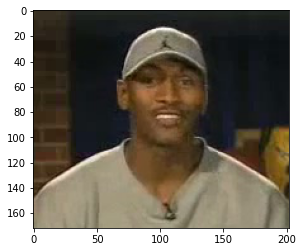

In [ ]:
# 영상 => ndarray
videoFile = np.load(fullPaths4[name]) # 데이터 파일명
colorImages = videoFile['colorImages']

# 영상 출력
def plot_images(img_list):
  def init():
    img.set_data(img_list[0])
    return (img,)

  def animate(i):
    img.set_data(img_list[i])
    return (img,)

  fig = plt.figure()
  ax = fig.gca()
  img = ax.imshow(img_list[0])
  anim = animation.FuncAnimation(fig, animate, init_func=init,
                                 frames=len(img_list), interval=25, blit=True, repeat=False)
  return anim

imgs=[]
for i in range(colorImages.shape[3]):
  imgs.append(colorImages[:,:,:,i])

HTML(plot_images(imgs).to_html5_video())

In [ ]:
manifest = pd.read_csv('/content/drive/Shareddrives/BME캡스톤/data/data_final/age_prediction/video/youtube_faces_with_keypoints_full.csv')
manifest

,videoID,personName,imageHeight,imageWidth,videoDuration,averageFaceSize,numVideosForPerson
0,Alison_Lohman_0,Alison_Lohman,228.0,213.0,240.0,90.150000,6.0
1,Alison_Lohman_1,Alison_Lohman,248.0,201.0,79.0,108.417722,6.0
2,Alison_Lohman_2,Alison_Lohman,335.0,308.0,136.0,122.161765,6.0
3,Alison_Lohman_3,Alison_Lohman,151.0,110.0,53.0,58.000000,6.0
4,Alison_Lohman_4,Alison_Lohman,236.0,228.0,147.0,91.680272,6.0
...,...,...,...,...,...,...,...
2189,Yossi_Beilin_3,Yossi_Beilin,240.0,243.0,240.0,110.258333,2.0
2190,Zahir_Shah_0,Zahir_Shah,196.0,200.0,143.0,93.944056,2.0
2191,Zahir_Shah_1,Zahir_Shah,240.0,293.0,240.0,155.495833,2.0
2192,Zoran_Djindjic_0,Zoran_Djindjic,230.0,237.0,240.0,98.908333,2.0


In [ ]:
'''
with np.load('/kaggle/input/youtube-faces-with-facial-keypoints/youtube_faces_with_keypoints_full_3/youtube_faces_with_keypoints_full_3/Natasa_Micic_0.npz') as data:
    colorImages = data['colorImages']
    boundingBox = data['boundingBox']
    landmarks2D = data['landmarks2D']
    landmarks3D = data['landmarks3D']
'''
# 이런식으로 데이터(landmark||boundingBox)를 읽어올 수 있음

'''
fig, _ = plt.subplots(1,1)
plt.axis('off')

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
ax = []

ax.append(fig.add_subplot(2,2,1))
plt.imshow(colorImages[:,:,:,0])
plt.axis('off')
plt.scatter(pd.DataFrame(boundingBox[:,:,0]).iloc[:,0],pd.DataFrame(boundingBox[:,:,0]).iloc[:,1],color='red')
plt.scatter(pd.DataFrame(landmarks2D[:,:,0]).iloc[:,0],pd.DataFrame(landmarks2D[:,:,0]).iloc[:,1],color='blue')
plt.scatter(pd.DataFrame(landmarks3D[:,:,0]).iloc[:,0],pd.DataFrame(landmarks3D[:,:,0]).iloc[:,1],color='orange',s=10)

ax.append(fig.add_subplot(2,2,2))
plt.imshow(colorImages[:,:,:,1])
plt.axis('off')
plt.scatter(pd.DataFrame(boundingBox[:,:,1]).iloc[:,0],pd.DataFrame(boundingBox[:,:,1]).iloc[:,1],color='red')
plt.scatter(pd.DataFrame(landmarks2D[:,:,1]).iloc[:,0],pd.DataFrame(landmarks2D[:,:,1]).iloc[:,1],color='blue')
plt.scatter(pd.DataFrame(landmarks3D[:,:,1]).iloc[:,0],pd.DataFrame(landmarks3D[:,:,1]).iloc[:,1],color='orange',s=10)

ax.append(fig.add_subplot(2,2,3))
plt.imshow(colorImages[:,:,:,2])
plt.axis('off')
plt.scatter(pd.DataFrame(boundingBox[:,:,2]).iloc[:,0],pd.DataFrame(boundingBox[:,:,2]).iloc[:,1],color='red')
plt.scatter(pd.DataFrame(landmarks2D[:,:,2]).iloc[:,0],pd.DataFrame(landmarks2D[:,:,2]).iloc[:,1],color='blue')
plt.scatter(pd.DataFrame(landmarks3D[:,:,2]).iloc[:,0],pd.DataFrame(landmarks3D[:,:,2]).iloc[:,1],color='orange',s=10)

ax.append(fig.add_subplot(2,2,4))
plt.imshow(colorImages[:,:,:,3])
plt.axis('off')
plt.scatter(pd.DataFrame(boundingBox[:,:,3]).iloc[:,0],pd.DataFrame(boundingBox[:,:,3]).iloc[:,1],color='red')
plt.scatter(pd.DataFrame(landmarks2D[:,:,3]).iloc[:,0],pd.DataFrame(landmarks2D[:,:,3]).iloc[:,1],color='blue')
plt.scatter(pd.DataFrame(landmarks3D[:,:,3]).iloc[:,0],pd.DataFrame(landmarks3D[:,:,3]).iloc[:,1],color='orange',s=10)
#plt.show()
'''
# bounding box와 2D(파란색),3D(주황색) keypoint가 중첩된 비디오 프레임 확인 가능

In [ ]:
# 모든 비디오의 파일 이름 가져오기
matches = []
for root, dirnames, filenames in os.walk('/content/drive/Shareddrives/BME캡스톤/data/data_final/age_prediction/video'):
    for filename in fnmatch.filter(filenames, '*.npz'):
        matches.append(os.path.join(root, filename))
matches # 각 파일의 경로를 저장해놓음

In [ ]:
matches = pd.DataFrame(matches)
matches.columns = ['file_name']
# 총 2194개의 파일 가져옴

matches = pd.DataFrame([(i,j) for i in manifest.videoID for j in matches.file_name  if i in j])
matches.columns = ['videoID','file_name']
# 파일명과 경로 일치시켜 위의 두가지 column 만들기

manifest = pd.merge(matches,manifest)

manifest

,videoID,file_name,personName,imageHeight,imageWidth,videoDuration,averageFaceSize,numVideosForPerson
0,Alison_Lohman_0,/content/drive/Shareddrives/BME캡스톤/data/d...,Alison_Lohman,228.0,213.0,240.0,90.150000,6.0
1,Alison_Lohman_1,/content/drive/Shareddrives/BME캡스톤/data/d...,Alison_Lohman,248.0,201.0,79.0,108.417722,6.0
2,Alison_Lohman_2,/content/drive/Shareddrives/BME캡스톤/data/d...,Alison_Lohman,335.0,308.0,136.0,122.161765,6.0
3,Alison_Lohman_3,/content/drive/Shareddrives/BME캡스톤/data/d...,Alison_Lohman,151.0,110.0,53.0,58.000000,6.0
4,Alison_Lohman_4,/content/drive/Shareddrives/BME캡스톤/data/d...,Alison_Lohman,236.0,228.0,147.0,91.680272,6.0
...,...,...,...,...,...,...,...,...
2189,Yossi_Beilin_3,/content/drive/Shareddrives/BME캡스톤/data/d...,Yossi_Beilin,240.0,243.0,240.0,110.258333,2.0
2190,Zahir_Shah_0,/content/drive/Shareddrives/BME캡스톤/data/d...,Zahir_Shah,196.0,200.0,143.0,93.944056,2.0
2191,Zahir_Shah_1,/content/drive/Shareddrives/BME캡스톤/data/d...,Zahir_Shah,240.0,293.0,240.0,155.495833,2.0
2192,Zoran_Djindjic_0,/content/drive/Shareddrives/BME캡스톤/data/d...,Zoran_Djindjic,230.0,237.0,240.0,98.908333,2.0


In [ ]:
# train_set : validation_se : test_set = 60 : 20 : 20
X_train, X_test = train_test_split(manifest,test_size=0.2)

# 인덱싱 재설정
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [ ]:
# keypoint data에 대해서 훈련 데이터 세트 만들기: 2D 랜드마크 이용
class FaceKeypointsDataset(Dataset):
    '''Face Keypoints Dataset'''
    def __init__(self, dataframe):
        self.dataframe = dataframe
    
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        with np.load(self.dataframe.file_name[idx]) as data:
            img = torch.from_numpy(data['colorImages']/255.)
            labels = torch.from_numpy(data['landmarks2D']) # 2D 랜드마크 이용
        return (img,labels)

In [ ]:
train_data = FaceKeypointsDataset(X_train)
test_data = FaceKeypointsDataset(X_test)

train_data_loader = DataLoader(train_data,batch_size=1,shuffle=True)
test_data_loader = DataLoader(test_data,batch_size=1,shuffle=False)

In [ ]:
# 사용할 convolutional network 지정
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 5)
        self.pool1 = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(32,64,3)
        self.pool2 = nn.MaxPool2d(2, 2)

        self.conv3 = nn.Conv2d(64,128,3)
        self.pool3 = nn.MaxPool2d(2, 2)

        self.conv4 = nn.Conv2d(128,256,3)
        self.pool4 = nn.MaxPool2d(2, 2)

        self.conv5 = nn.Conv2d(256,512,1)
        self.pool5 = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(18432, 1024)
        self.fc2 = nn.Linear(1024, 136)
        
        self.drop1 = nn.Dropout(p = 0.1)
        self.drop2 = nn.Dropout(p = 0.2)
        self.drop3 = nn.Dropout(p = 0.25)
        self.drop4 = nn.Dropout(p = 0.25)
        self.drop5 = nn.Dropout(p = 0.3)
        self.drop6 = nn.Dropout(p = 0.4)
    def forward(self, x):
      
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.drop1(x)
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.drop2(x)
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.drop3(x)
        x = self.pool4(F.relu(self.conv4(x)))
        x = self.drop4(x)
        x = self.pool5(F.relu(self.conv5(x)))
        x = self.drop5(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.drop6(x)
        x = self.fc2(x)
        return x

In [ ]:
net = Net()
net = net.double() # 데이터가 이중이므로 네트워크도 이중으로
net.cuda() # GPU로

In [ ]:
net

Net(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(256, 512, kernel_size=(1, 1), stride=(1, 1))
  (pool5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=18432, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=136, bias=True)
  (drop1): Dropout(p=0.1, inplace=False)
  (drop2): Dropout(p=0.2, inplace=False)
  (drop3): Dropout(p=0.25, inplace=False)
  (d

In [ ]:
criterion = torch.nn.SmoothL1Loss() # 손실함수 정의(pytorch tutorial에서는 nn.CrossEntropyLoss()로 정의)
optimizer = optim.Adam(net.parameters(), lr = 0.001) # 최적화 정의(pytorch tutorial에서는 optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)로 정의)

In [ ]:
best_accuracy=0
for epoch in range(50):
    running_loss = 0.0
    epoch_loss = []
    t = 0
    for i, data in enumerate(train_data_loader, 0):
        # input = [inputs, labels]
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()
        
        for j in range(inputs.shape[4]):
            t+=1
            inp = inputs[:,:,:,:,j]
            inp = inp.permute(0,3,1,2)
            inp = F.interpolate(inp, size=(224, 224), mode='bicubic', align_corners=False)
            lab = labels[:,:,:,j]

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inp)
            loss = criterion(outputs.view(-1), lab.view(-1))
            loss.backward()
            optimizer.step()

            # 상태 점검
            running_loss += loss.item()
            epoch_loss.append(loss.item())
            if t % 5000 == 4999: # 1000번씩 돌 때마다 print
                samp = int(np.random.randint(low=0,high=len(test_data)-1,size=1))
                test1 = test_data[samp][0][:,:,:,0].unsqueeze(0).permute(0,3,1,2).cuda()
                test1 = F.interpolate(test1, size=(224, 224), mode='bicubic', align_corners=False)
                plt.imshow(np.moveaxis(test1.cpu().detach().numpy()[0,:,:,:],0,-1))
                plt.scatter(pd.DataFrame(net(test1).cpu().detach().numpy().reshape(68,2)).iloc[:,0],
                       pd.DataFrame(net(test1).cpu().detach().numpy().reshape(68,2)).iloc[:,1], s=5, c='c',marker='o',)
                plt.title(f'epoch {epoch+1} / batch step: {t} / average loss for last 5000 images:{running_loss/5000}');
                plt.show()
                plt.gcf().show()
                running_loss = 0.0
                '''
            torch.save({
                'epoch': epoch,
                'model_parameter_state_dict':net.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'model_state_dict':net,
                'loss': loss
            }, '/content/drive/Shareddrives/BME캡스톤/code/KYJ/Param/check_point.pt')
            
            if net.accuracy > best_accuracy: 
              torch.save(net, 'best-model.pt')
              torch.save(net.state_dict(), 'best-model-parameters.pt')
              '''
    print(f'Epoch {epoch} / loss: ',np.mean(epoch_loss))
   # print(f'Epoch {epoch} / loss: ',np.mean(epoch_loss),f'/ Accuracy {net.accuracy}')

NameError: ignored

In [ ]:
# 모델 불러오기(1)
model = Net(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.eval()
# 모델 불러오기(2)
model = TheModelClass(*args, **kwargs)
optimizer = TheOptimizerClass(*args, **kwargs)

checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

model.eval()
# - or -
model.train()
# 모델 불러오기(3)
the_model = TheModelClass(*args, **kwargs)
the_model.load_state_dict(torch.load(PATH))